In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [137]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df.head()

,Timestamp,Which age group you belong to?,Location(From which state you are?),Is it difficult to get essentials(food/medicine)?,What is your gender?,How you ever felt symptoms of COVID?,Do you have any of the following conditions?,During the lockdown have you been doing more household work?,Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?,How often do you use masks/hand sanitizers(per day)?,...,"Over the last 2 weeks, how often have you been bothered by being so restless that it is hard to sit still?","Over the last 2 weeks, how often have you been bothered by trouble relaxing?","Over the last 2 weeks, how often have you been bothered by becoming easily an0yed or irritable?","Over the last 2 weeks, how often have you been bothered by feeling afraid as if something awful might happen?",Anxiety Numerical,Level Of Anxiety,Immunity,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,2020-06-19 13:39:55.750,2,1,0,1,0,0,1,1,0,...,0,0,1,0,2,0,1,NaN,NaN,NaN
1,2020-06-19 13:40:56.063,2,1,0,1,0,0,0,0,0,...,1,1,0,1,5,1,0,NaN,NaN,NaN
2,2020-06-19 13:42:22.938,2,1,0,1,0,0,1,0,0,...,0,1,2,1,10,2,1,NaN,NaN,NaN
3,2020-06-19 13:51:35.532,2,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-06-19 13:51:44.612,2,1,0,1,0,0,0,1,1,...,0,0,0,1,1,0,1,NaN,NaN,NaN


In [3]:
X=df[['Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'How often do you leave your house?(per week) ',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

In [15]:
y=df['Anxiety Numerical ']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [18]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
reduced_data=reduced_data=PCA(n_components=2).fit_transform(X_train)
results=pd.DataFrame(reduced_data,columns=['pca1','pca2'])

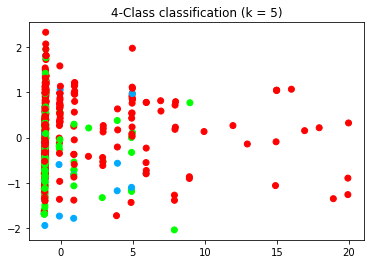

In [20]:
from matplotlib.colors import ListedColormap
# Plot also the training points
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
plt.scatter(results['pca1'], results['pca2'], c=y_train, cmap=cmap_bold)
plt.title("4-Class classification (k = %i)" % (5))
plt.show()

In [62]:
y_train.unique()

array([ 7,  0, 13,  4,  9,  3,  5, 15,  8, 11,  2,  1, 19,  6, 10, 14, 12,
       17, 21, 16, 18, 20], dtype=int64)

In [63]:
y_t=neigh.predict(X_test)

In [64]:
y_test.tolist()

[9,
 1,
 10,
 0,
 0,
 8,
 0,
 1,
 21,
 3,
 0,
 13,
 0,
 0,
 0,
 3,
 4,
 6,
 3,
 8,
 1,
 2,
 2,
 0,
 6,
 0,
 0,
 7,
 12,
 0,
 6,
 7,
 13,
 0,
 2,
 13,
 3,
 13,
 1,
 3,
 7,
 8,
 4,
 5,
 0,
 2,
 0,
 14,
 5,
 6,
 16,
 2,
 20,
 6,
 0,
 4,
 5,
 0,
 8,
 3,
 11,
 9,
 7,
 6,
 18,
 7,
 0,
 1,
 12,
 7,
 6,
 0,
 0,
 19,
 11,
 1,
 8,
 9,
 8,
 4,
 1,
 0,
 1,
 14,
 15,
 0,
 3,
 4,
 1,
 3,
 0,
 7,
 0,
 7,
 11,
 4,
 6,
 0,
 0,
 0,
 5,
 5,
 0,
 4,
 4,
 2,
 7,
 5,
 11,
 0,
 1,
 2,
 0,
 4,
 0,
 6,
 5,
 7,
 7,
 5,
 3,
 0,
 10,
 0,
 17,
 0,
 10,
 9,
 1,
 5,
 10,
 12,
 2,
 0,
 6,
 9,
 5,
 4,
 4,
 4,
 14,
 0,
 5,
 8,
 9,
 8,
 0,
 1,
 0,
 5,
 0,
 2,
 7,
 11,
 9,
 6,
 2,
 8,
 7,
 11,
 2,
 15,
 1,
 0,
 5,
 4]

In [65]:
y_t.tolist()

[7,
 0,
 5,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 7,
 8,
 0,
 1,
 0,
 0,
 7,
 2,
 0,
 5,
 0,
 0,
 3,
 0,
 0,
 0,
 7,
 5,
 0,
 7,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 0,
 7,
 7,
 7,
 7,
 0,
 0,
 7,
 7,
 0,
 0,
 0,
 7,
 4,
 0,
 0,
 7,
 0,
 2,
 1,
 0,
 6,
 7,
 0,
 0,
 8,
 6,
 0,
 1,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 7,
 0,
 1,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 4,
 7,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 7,
 0,
 0,
 7,
 6,
 0,
 4,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 7,
 0,
 0,
 0,
 0]

In [25]:
from sklearn.metrics import mean_squared_error
import math
mse=mean_squared_error(y_test, y_t)
rmse=math.sqrt(mse)
rmse

6.780109108124462

In [67]:
X=df[['Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID? ',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'How often do you leave your house?(per week) ',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

In [4]:
y=df['Level Of Anxiety ']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [7]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
reduced_data=reduced_data=PCA(n_components=2).fit_transform(X_train)
results=pd.DataFrame(reduced_data,columns=['pca1','pca2'])

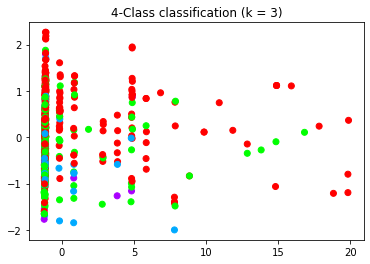

In [10]:
from matplotlib.colors import ListedColormap
# Plot also the training points
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF','#AA00FF'])
plt.scatter(results['pca1'], results['pca2'], c=y_train, cmap=cmap_bold)
plt.title("4-Class classification (k = %i)" % (3))
plt.show()

In [11]:
y_test.tolist()

[1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 3,
 0,
 1,
 3,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2]

In [12]:
y_t=neigh.predict(X_test)

In [13]:
y_t.tolist()

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 1]

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_t)

0.5903614457831325

In [98]:
#Only Chi-feature selection
X= df[['Location(From which state you are?)',
      'Is it difficult to get essentials(food/medicine)?',
      'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
      'Has your sleep cycle changed drastically?',
      'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
      'Are you stuck somewhere alone without support from friends or family? ',
      'Do you miss hanging out with people outside of your house?',
      'Have you been affected by not being able to visit religious places?',
      'How often do you eat outside food? (per week) ',
      'Are you in a containment zone? ',
      'Do you have any of the following conditions?',
      'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ']]

In [112]:
y=df['Level Of Anxiety ']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [114]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [115]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [116]:
reduced_data=reduced_data=PCA(n_components=2).fit_transform(X_train)
results=pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [117]:
y_t=neigh.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_t)

0.5421686746987951

In [282]:
#Taking Highly correlated features
X=df[['What is your gender?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID? ',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'Are you in a containment zone? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ',
       'Do you have online classes/assignments/assessments/tests? ',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?'
       ]]

In [281]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df=df.loc[df['Which age group you belong to?']==2]
df=df.loc[df['Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ']!=1]

In [283]:
X.head()

,What is your gender?,During the lockdown have you been doing more household work?,Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?,How often do you use masks/hand sanitizers(per day)?,Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?,Are you in a containment zone?,"Do you have children less than 3 yrs, or elders 65+ at your house?",Have you ever felt afraid or anxious to go to hospital during this pandemic?,Has your sleep cycle changed drastically?,"Have you felt frustrated by having your activities, major life events or opportunities affected by the virus?",Do you have online classes/assignments/assessments/tests?,Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?,Have you been affected by not being able to visit religious places?
0,1,1,1,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,1,1,1,0,1,0,0
2,1,1,0,0,1,0,1,0,1,0,1,1,0
15,0,1,0,1,0,1,0,1,1,0,0,0,0
17,0,1,0,1,1,1,0,0,1,0,0,1,1


In [284]:
y=df['Level Of Anxiety ']

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [292]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [293]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [294]:
y_t=neigh.predict(X_test)

In [295]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_t)

0.75

In [296]:
y_t

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [297]:
y_test

747    0
248    0
536    1
792    1
259    0
2      2
184    0
425    0
440    0
760    0
107    0
461    0
781    0
786    0
18     0
266    0
313    0
808    0
567    0
512    1
321    0
575    0
183    0
501    1
66     1
15     0
28     1
829    0
815    1
212    0
80     0
343    1
Name: Level Of Anxiety , dtype: int64

In [237]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)
df=df.loc[df['Which age group you belong to?']==2]
df=df.loc[df['Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ']!=0]

In [272]:
X=df[['During the lockdown have you been doing more household work?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week) ',
       'Are you in a containment zone? ',
       'Are you stuck somewhere alone without support from friends or family? ',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests? ',
       'Did you face a pay cut/job loss/take a0ther job to cover expenses?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?'
       ]]

In [273]:
y=df['Level Of Anxiety ']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [274]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [275]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [276]:
y_t=neigh.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_t)

0.25

In [278]:
y_t

array([1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 1], dtype=int64)

In [279]:
y_test

798    2
787    0
790    2
753    0
778    0
505    2
806    0
415    2
659    1
283    0
750    1
685    0
767    2
548    1
678    2
480    2
416    0
95     0
589    0
214    0
346    1
331    1
181    0
112    0
253    0
394    3
72     1
384    2
Name: Level Of Anxiety , dtype: int64